In [4]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import seaborn as sns
import os
import json
from itertools import permutations
from sklearn.decomposition import PCA

np.random.seed(42)

%matplotlib inline

In [5]:
# Set data input folder
input_folder = "inputs"

# Set output folder, subfolder
output_folder = "outputs"
if not os.path.exists(output_folder):
    os.makedirs(output_folder, exist_ok=True)

In [6]:
whole_cell_hits = pd.read_csv(os.path.join(output_folder,'HeLa_SABER_plate_level_median_per_feat_sig_genes_1_FDR_whole_cell_hits.csv'))
comp_spec_hits = pd.read_csv(os.path.join(output_folder,'HeLa_SABER_plate_level_median_per_feat_sig_genes_1_FDR_compartment_specific_hits.csv'))
all_hits = pd.concat([whole_cell_hits,comp_spec_hits])
all_hits

,Gene,DNA,Phalloidin,WGA,ConA,Catalase,btubulin,NfKb,COXIV,LAMP1,PRSP6,Syto9,TDP43,G3BP1,Sum
0,ABCF1,8.0,20.0,14.0,20.0,6.0,22.0,22.0,37.0,25.0,33.0,15.0,13.0,26.0,197.0
1,ACTR2,120.0,103.0,91.0,95.0,80.0,87.0,93.0,116.0,60.0,75.0,148.0,94.0,89.0,1023.0
2,ACTR3,91.0,87.0,85.0,66.0,67.0,70.0,78.0,103.0,62.0,54.0,124.0,71.0,73.0,837.0
3,ALG13,67.0,37.0,52.0,95.0,24.0,38.0,38.0,80.0,83.0,82.0,75.0,52.0,31.0,599.0
4,ALG5,17.0,21.0,36.0,90.0,5.0,15.0,22.0,27.0,118.0,19.0,15.0,27.0,3.0,310.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,UBQLN2,1.0,11.0,7.0,2.0,0.0,6.0,5.0,23.0,14.0,19.0,7.0,4.0,2.0,72.0
90,UCP2,5.0,4.0,3.0,2.0,6.0,6.0,21.0,6.0,10.0,6.0,12.0,7.0,14.0,77.0
91,USP1,4.0,8.0,17.0,7.0,2.0,0.0,8.0,15.0,4.0,5.0,24.0,15.0,3.0,70.0
92,ZNF131,20.0,5.0,15.0,5.0,3.0,3.0,13.0,29.0,7.0,9.0,9.0,8.0,12.0,90.0


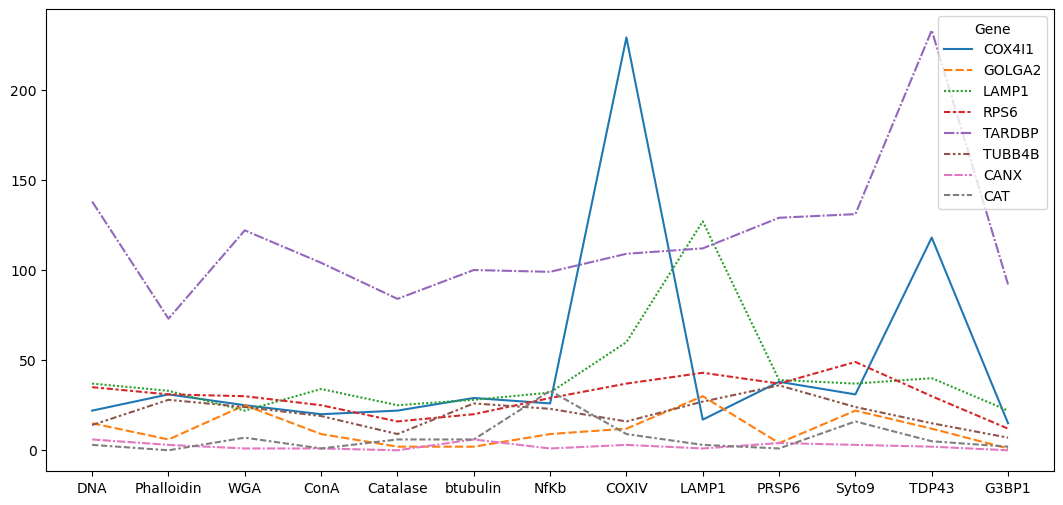

In [7]:
selected_targets_list = ['TARDBP','COX4I1', 'CANX','LAMP1','RPS6','TUBB4B','GOLGA2','CAT']
selected_targets_df = all_hits[all_hits['Gene'].isin(selected_targets_list)].set_index('Gene').drop('Sum',axis=1)
fig, ax = plt.subplots(figsize=(13,6))
sns.lineplot(selected_targets_df.T,ax=ax)
fig.savefig(os.path.join(output_folder,'figure_panels','HeLa_SABER_targeted_channels_ditribution.png'), dpi=300,facecolor='w', edgecolor='w', bbox_inches='tight')
plt.show()

## 